# Seedstar 

by **Jennie** 

- Combine the workbooks from other collaborators for Seedstar data cleaning
- Perfom EDA

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import string


# Visualization libararies
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True) # Require to use plotly offline in jupyter notebook
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_white"

import plotly.io as pio
from IPython.display import Image # to produce plotly staic image on Github

pd.set_option('display.max_columns', None)

#pip install svglib
# Configuration for high resolution for rendered images on notebook
%config InlineBackend.figure_format='retina'

from IPython.display import SVG, display
'''Display markdown formatted output like bold, italic bold, ...'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Load Data

In [2]:
seedstar = pd.read_excel('Seedstar_partnerdata.xlsx')

## Data Overview

In [3]:
seedstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 90 columns):
 #   Column                                                                                  Non-Null Count  Dtype         
---  ------                                                                                  --------------  -----         
 0   company_id                                                                              4255 non-null   int64         
 1   event_name                                                                              4237 non-null   object        
 2   country                                                                                 4242 non-null   object        
 3   industry                                                                                4133 non-null   object        
 4   business_stage                                                                          3560 non-null   object        
 5   incorporated        

## Notes:
- There are multiple columns with missing value, but there are columns with no value. So we will drop these columns with no value firrst.


## Data Cleaning
### 1. Drop all columns with only NULL values

In [4]:
# Drop all NA columns
seedstar = seedstar.dropna(axis=1, how='all')
#seedstar.head(5)

In [5]:
#seedstar.info()

### **2. Drop missing values (columns with NA data > 80%)**

In [6]:
# Drop seedstars with more than 80% of columns
percent_missing = seedstar.isnull().sum()*100/len(seedstar)
NA_seedstar = pd.DataFrame({'column_name': seedstar.columns,
                            'percent_missing': percent_missing})
# Columns with more than 80% of missing data
print('\nColumns with more than 80% of missing data:')
NA_seedstar[NA_seedstar['percent_missing']>=80]


Columns with more than 80% of missing data:


,column_name,percent_missing
date_first_sale,date_first_sale,83.666275
birthdate_1,birthdate_1,88.108108
Age of the entrepreneur 1,Age of the entrepreneur 1,88.108108
birthdate_2,birthdate_2,93.137485
Age of the entrepreneur 2,Age of the entrepreneur 2,93.137485
city_2,city_2,86.815511
country_2,country_2,86.768508
Latest annualized revenues USD,Latest annualized revenues USD,98.824912
CAGR since incorporation,CAGR since incorporation,99.130435
# of employees - normalise it or average it + add the date when the data was collected,# of employees - normalise it or average it + ...,92.432432


In [7]:
# Drop all the columns with more than 80% of missing value
#more80_NA_col = (NA_seedstar[NA_seedstar['percent_missing']>=80].column_name)
#seedstar.drop(more80_NA_col, axis=1, inplace=True)

In [8]:
seedstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 74 columns):
 #   Column                                                                                  Non-Null Count  Dtype         
---  ------                                                                                  --------------  -----         
 0   company_id                                                                              4255 non-null   int64         
 1   event_name                                                                              4237 non-null   object        
 2   country                                                                                 4242 non-null   object        
 3   industry                                                                                4133 non-null   object        
 4   business_stage                                                                          3560 non-null   object        
 5   incorporated        

In [9]:
#seedstar.head(5)

In [10]:
#seedstar.tail(5)

### **3. Looking at certain columns**

## DATE TIME 

- Utilize Date_Created and Date_First_Sale to fill out Incorporation_date missing data

##  `Date_Created`

In [11]:
seedstar['date_created'].unique()

array([datetime.datetime(2018, 4, 1, 0, 0), nan,
       datetime.datetime(2019, 6, 1, 0, 0),
       datetime.datetime(2018, 6, 1, 0, 0),
       datetime.datetime(2018, 10, 1, 0, 0),
       datetime.datetime(2019, 7, 1, 0, 0),
       datetime.datetime(2018, 8, 1, 0, 0),
       datetime.datetime(2019, 10, 1, 0, 0),
       datetime.datetime(2019, 11, 1, 0, 0),
       datetime.datetime(2018, 5, 1, 0, 0),
       datetime.datetime(2019, 8, 1, 0, 0),
       datetime.datetime(2018, 12, 1, 0, 0),
       datetime.datetime(2018, 7, 1, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2018, 11, 1, 0, 0),
       datetime.datetime(2019, 9, 1, 0, 0),
       datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2017, 10, 1, 0, 0),
       datetime.datetime(2019, 5, 1, 0, 0),
       datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2017, 11, 1, 0, 0),
       datetime.date

#### 'SSW15' represent Seedstar Winning season 2015 - So we can assume to extract the year values of 2015 from these columns 

In [12]:
# Replace SSW15 with 2015 season
seedstar['date_created'] = seedstar['date_created'].apply(lambda x: x.replace(x, '2015') 
                                                          if str(x).startswith('SSW15') else x)\
                
# Extract year from date_created
seedstar['date_created'] =  seedstar['date_created'].apply(lambda x: x.year if x is not None else x)

In [13]:
# Checck the percentage of missing value in date_created
print('Date_created column has {}% missing values'\
      .format(round(100*seedstar['date_created'].isnull().sum()/len(seedstar),2)))

Date_created column has 61.03% missing values


In [14]:
#seedstar['date_created'].describe()

- There are 1658 values in date_created. The data range from 2015 to 2020

## `incorporation_date`

**incorporation date**: The IRS answer for when a corporation begins is that it's the date of incorporation; that is, the date when the state recognized and filed the business registration.

In [15]:
# Check the percentage of missing value in incorporation_date columns
print('incorporation_date column has {}% missing values'\
      .format(round(100*seedstar['incorporation_date'].isnull().sum()/len(seedstar),2)))
print('\r')
# Take a closer look at incorporation date for inconsistent values
print('incorporation_date column has "{}" data type'.format(seedstar.incorporation_date.dtype))

incorporation_date column has 13.28% missing values

incorporation_date column has "object" data type


In [16]:
seedstar['incorporation_date'].unique()

array([datetime.datetime(2017, 9, 1, 0, 0),
       datetime.datetime(2017, 2, 1, 0, 0),
       datetime.datetime(2015, 11, 1, 0, 0),
       datetime.datetime(2016, 3, 1, 0, 0),
       datetime.datetime(2015, 5, 1, 0, 0),
       datetime.datetime(2015, 8, 1, 0, 0),
       datetime.datetime(2016, 2, 1, 0, 0),
       datetime.datetime(2015, 7, 1, 0, 0),
       datetime.datetime(2016, 9, 1, 0, 0),
       datetime.datetime(2018, 3, 1, 0, 0),
       datetime.datetime(2016, 5, 1, 0, 0),
       datetime.datetime(2017, 10, 1, 0, 0),
       datetime.datetime(2019, 7, 1, 0, 0),
       datetime.datetime(2014, 12, 1, 0, 0),
       datetime.datetime(2016, 6, 1, 0, 0),
       datetime.datetime(2013, 4, 1, 0, 0),
       datetime.datetime(2012, 6, 1, 0, 0),
       datetime.datetime(2012, 9, 1, 0, 0),
       datetime.datetime(2017, 3, 1, 0, 0),
       datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2013, 9, 1, 0, 0), nan,
       datetime.datetime(2017, 4, 1, 0, 0),
       datetime.datetime

In [17]:
incorporation_date_datatype = set([type(i) for i in seedstar['incorporation_date']])
print('Column incorporation_date contains {} data types:\n\n{}'\
      .format(len(incorporation_date_datatype), (incorporation_date_datatype)))

Column incorporation_date contains 3 data types:

{<class 'float'>, <class 'datetime.datetime'>, <class 'str'>}


#### `incorporation_date` has 3 data types : 'float', 'datetime.datetime', 'str'. 
#### Therefore, the data types are not consistent so we will fix this problem by extract year from these data.
#### The 'float' data type in the columns is nan values

In [18]:
# Extract year from incorporation_date
seedstar['incorporation_date'] = seedstar['incorporation_date']\
    .apply(lambda x: x.year if isinstance(x, datetime.datetime) # Extract year if data type is datetime.datetime 
           else (float(x[:4]) if type(x) == str else x))        # Extract year if data type is str                           

#### Before further engineering to fill missing values using the data between these two columns, we need to look at the descriptive statistic from these two columns

In [19]:
seedstar[['incorporation_date','date_created']].describe()

,incorporation_date,date_created
count,3690.000000,1658.000000
mean,2015.659621,2018.560314
std,2.408335,0.603984
min,1970.000000,2015.000000
25%,2014.000000,2018.000000
50%,2016.000000,2019.000000
75%,2017.000000,2019.000000
max,2020.000000,2020.000000


The minimum year of incorporation_date is 1970, while it seems like other year range from 2015 to 2020. There might be an incorrect record. We need to look into this

In [20]:
# Looking at the company before 2000
seedstar[seedstar['incorporation_date'] < 2000].sort_values(by = ['incorporation_date'])

,company_id,event_name,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,date_first_sale,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,birthdate_1,Age of the entrepreneur 1,city_1,country_1,role_2,gender_2,birthdate_2,Age of the entrepreneur 2,city_2,country_2,company_logo,date_created,Latest annualized revenues USD,CAGR since incorporation,# of employees - normalise it or average it + add the date when the data was collected,Date we collected the information,Funding before Seedstars,FUNDING AFTER THE EVENT,Total Funding,NEW DATA?,WEBSITE DEAD?,Funding after the event?,FUNDING - ALL FROM 3RD PARTY
677,678,Accra,Ghana,Other,NaN,NaN,1970.0,608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaT,0,NaN,0.0,YES,Dead,NaN,NaN
2235,2236,Nairobi,Kenya,Other,NaN,NaN,1970.0,608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,CSO,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaT,0,NaN,0.0,NaN,Alive,NaN,NaN
2464,2465,Singapore,Singapore,Social Networking and Collaboration,NaN,NaN,1990.0,366.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Creative Director,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaT,0,NaN,0.0,YES,Dead,NaN,NaN


#### We don't have a lot of data from incorporation date outliers of 1970 and 1990, should we remove the data ? 

**If `incorporation_date` is missing, replace with `date_created` (if it's a  date not a descriptive text). Then drop `date_created`**

In [21]:
test = seedstar[seedstar['incorporation_date'].isnull() == True][['incorporation_date','date_created']]
test[test['date_created'].isnull() == False]

,incorporation_date,date_created
478,NaN,2018.0
1090,NaN,2019.0
1095,NaN,2015.0
1110,NaN,2019.0
1651,NaN,2019.0
1700,NaN,2019.0
1712,NaN,2019.0
1801,NaN,2019.0
1818,NaN,2015.0
1930,NaN,2019.0


In [22]:
# Fill missing value of incorporation date with date created
seedstar.incorporation_date.fillna(seedstar.date_created, inplace = True)

In [23]:
print('The current missing value from incorporation date now is {}%'.\
      format(round(seedstar['incorporation_date'].isnull().sum()* 100 / len(seedstar),2)))

The current missing value from incorporation date now is 12.71%


### Missing value in incorporation date decreased roughly by 1% (from 13% to 12%)
### Now we can drop date_created ?

In [24]:
# Drop date_created

## `date_first_sale`


In [25]:
#seedstar['date_first_sale'].unique()

In [26]:
seedstar['date_first_sale'] = seedstar['date_first_sale']\
    .apply(lambda x: x.year if isinstance(x, datetime.datetime) else x)
seedstar['date_first_sale'].value_counts()

2015.0    320
2016.0    218
2014.0    120
2013.0     26
2011.0      6
2012.0      3
2010.0      1
2017.0      1
Name: date_first_sale, dtype: int64

In [27]:
# boxplot for incorporation_date and date_created
fig = go.Figure()
fig.add_trace(go.Box(x=seedstar.incorporation_date,
                     name = 'Incorporation Date (Year)'))
fig.add_trace(go.Box(x=seedstar.date_created,
                     name = 'Created Date (Year)'))
fig.add_trace(go.Box(x=seedstar.date_first_sale,
                     name = 'Date First Sale (Year)'))
fig.update_layout(title = {'text':"Boxplot of created_date and incorporation_date",
                           'y': 0.9, 'x': 0.5,
                           'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Year")

fig.show()

# Remove the hashtag in front of the columns below to show staic image in github
# Image(pio.to_image(fig, format='png', scale=5))

We can try to fill missing value in incorporation date with date first sale - since we don't have other data for incorporation date so the date of first sale can be a good proxy for the date when the business starts

In [28]:
# Fill NA values in incorporation_date with values in date_first_year
seedstar.incorporation_date.fillna(seedstar.date_first_sale, inplace=True)

In [29]:
print('The current missing value from incorporation date now is {}%'.\
      format(round(seedstar['incorporation_date'].isnull().sum()* 100 / len(seedstar),2)))

The current missing value from incorporation date now is 9.21%


#### Now missing value in incorporation date is decreased by 3%. We can fill the rest of missing value with mode

In [30]:
print('the mode of incorporation_date is: {}'.format(seedstar.incorporation_date.mode().values))

the mode of incorporation_date is: [2017.]


In [31]:
seedstar.incorporation_date.mode()[0]

2017.0

In [32]:
# fill other NA in missing value with mode
seedstar.incorporation_date.fillna(seedstar.incorporation_date.mode()[0], inplace=True)

In [33]:
# Plot histogram of incorporation date
fig = px.histogram(seedstar, x='incorporation_date', histnorm = 'probability density')
fig.update_layout(title='Histogram of incorporation_date')
fig.show()

# Remove the hashtag in front of the columns below to show staic image in github
# Image(pio.to_image(fig, format='png', scale=5))

## FOUNDER

## `Age`

- What's `Age Today` ? Should we keep it or drop it ?

In [34]:
# Extract the columns about age
age_col = [i for i in seedstar.columns if 'Age' in i]
seedstar[age_col].head(5)

,Age today,Age of the entrepreneur 0,Age of the entrepreneur 1,Age of the entrepreneur 2
0,36.0,31.0,NaN,NaN
1,43.0,43.0,36.0,29.0
2,58.0,NaN,NaN,NaN
3,54.0,NaN,NaN,NaN
4,64.0,NaN,NaN,NaN


In [35]:
seedstar[age_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age today                  3690 non-null   float64
 1   Age of the entrepreneur 0  1510 non-null   float64
 2   Age of the entrepreneur 1  506 non-null    float64
 3   Age of the entrepreneur 2  292 non-null    float64
dtypes: float64(4)
memory usage: 133.1 KB


In [36]:
seedstar[age_col].describe()

,Age today,Age of the entrepreneur 0,Age of the entrepreneur 1,Age of the entrepreneur 2
count,3690.000000,1510.000000,506.000000,292.000000
mean,54.835501,32.313245,32.407115,31.479452
std,28.760295,8.775260,9.887900,11.237039
min,6.000000,1.000000,1.000000,1.000000
25%,35.000000,28.000000,27.000000,26.000000
50%,51.000000,32.000000,32.000000,30.000000
75%,72.000000,37.000000,37.000000,36.000000
max,608.000000,108.000000,127.000000,133.000000


- To clean and engineer Age of entrepreneur - create a new columns, which is the average of entrepreneur 0, 1, 2

In [37]:
#seedstar[['Age of the entrepreneur 0','Age of the entrepreneur 1','Age of the entrepreneur 2']]

In [38]:
# boxplot for incorporation_date and date_created
fig = go.Figure()
fig.add_trace(go.Box(x=seedstar['Age of the entrepreneur 0'],
                     name = 'Age of the entrepreneur 0'))
fig.add_trace(go.Box(x=seedstar['Age of the entrepreneur 1'],
                     name = 'Age of the entrepreneur 1'))
fig.add_trace(go.Box(x=seedstar['Age of the entrepreneur 2'],
                     name = 'Age of the entrepreneur 2'))

fig.update_layout(title = {'text':"Boxplot of entrepreneur age",
                           'y': 0.9, 'x': 0.5,
                           'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Age")

fig.show()
# Remove the hashtag in front of the columns below to show staic image in github
# Image(pio.to_image(fig, format='png', scale=5))

There are certain outliers that does not make sense in the entreprenuer age which are more than 100 years old or less than 5 years old

In [39]:
# looking at outlier
seedstar[age_col][(seedstar['Age of the entrepreneur 0']>80) | 
                  (seedstar['Age of the entrepreneur 1']>80) | 
                  (seedstar['Age of the entrepreneur 2']>80)]

,Age today,Age of the entrepreneur 0,Age of the entrepreneur 1,Age of the entrepreneur 2
1274,38.0,108.0,35.0,NaN
1436,51.0,36.0,46.0,133.0
3933,47.0,92.0,NaN,NaN
4061,46.0,33.0,127.0,NaN


In [40]:
seedstar[(seedstar['Age of the entrepreneur 0']>80) | 
                  (seedstar['Age of the entrepreneur 1']>80) | 
                  (seedstar['Age of the entrepreneur 2']>80)]

,company_id,event_name,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,date_first_sale,number of competitors,role_0,gender_0,birthdate_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,birthdate_1,Age of the entrepreneur 1,city_1,country_1,role_2,gender_2,birthdate_2,Age of the entrepreneur 2,city_2,country_2,company_logo,date_created,Latest annualized revenues USD,CAGR since incorporation,# of employees - normalise it or average it + add the date when the data was collected,Date we collected the information,Funding before Seedstars,FUNDING AFTER THE EVENT,Total Funding,NEW DATA?,WEBSITE DEAD?,Funding after the event?,FUNDING - ALL FROM 3RD PARTY
1274,1275,Seedstars Lima,Peru,Health / Wellness,Beta Testing Stage,0.0,2017.0,38.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,0,NaN,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,Founder,0.0,1912-08-01,108.0,Lima,Peru,NaN,1.0,1985-08-01,35.0,Lima,Peru,NaN,NaN,NaT,NaN,NaN,NaN,1,2018.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Alive,NaN,NaN
1436,1437,Seedstars Quito,Ecuador,Consumer Services,Pre-Revenue Stage,0.0,2016.0,51.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Just started raising,0,200000,2.0,1550.0,1300.0,1100.0,800.0,650.0,500.0,80.0,65.0,50.0,NaN,NaN,NaN,1600.0,NaN,3.0,Founder,0.0,1984-02-01,36.0,Cuenca,Ecuador,Operations Engineer,0.0,1974-03-01,46.0,Cuenca,Ecuador,CTO,0.0,1887-03-01,133.0,New York,United States of America,1,2018.0,NaN,NaN,NaN,NaT,200000,NaN,200000.0,NaN,Alive,NaN,NaN
3933,3934,Seedstars Cairo,Egypt,Financial Services: Fin Tech,Revenue Stage,1.0,2016.0,47.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,Closed,1065000,750000,17.0,0.0,0.0,3000.0,63000.0,45000.0,33000.0,1008.0,700.0,400.0,NaN,NaN,NaN,18000.0,NaN,3.0,Founder,0.0,1928-04-01,92.0,Giza,Egypt,CTO,0.0,NaT,NaN,NaN,NaN,Operations & Banking Compliance Manager,0.0,NaT,NaN,NaN,NaN,1,2018.0,NaN,NaN,NaN,NaT,750000,NaN,750000.0,NaN,Alive,NaN,NaN
4061,4062,Seedstars Lima,Peru,Advertising and Marketing,Revenue Stage,1.0,2016.0,46.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,75000,NaN,3.0,1100.0,990.0,580.0,130.0,120.0,75.0,24.0,17.0,13.0,NaN,NaN,NaN,4000.0,NaN,3.0,Founder,0.0,1987-07-01,33.0,Lima,Peru,NaN,0.0,1893-09-01,127.0,Lima,Peru,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Alive,NaN,NaN


Looking at the data and the boxplot, it is easy to see that there are probably some typo in the data, for example 127 could be 27, or 133 could be 33, and 92 could be 29. The range of the age should be roughly in the range of 20 to 80

In [41]:
for i in age_col:
    print('Mode of column - {}: {}'.format(i, seedstar[i].mode()[0]))

Mode of column - Age today: 44.0
Mode of column - Age of the entrepreneur 0: 30.0
Mode of column - Age of the entrepreneur 1: 27.0
Mode of column - Age of the entrepreneur 2: 25.0


- For **`Age of the entrepreneur 0`**, the outlier is 108, which is quite hard to estimate the correct value, so **replace it with mode** but the outlier of 92 can be replaced with 29 - since the mode is 30, which is approximately the same and we can assume that the data is a typo.

- For **`Age of the entrepreneur 1`**, the outlier is 127, we can replace it with 27 which is closely to the mode of entrepreneur 1

- For **`Age of the entrepreneur 2`**, the outlier is 133, we can replace it with 33 which can be assume this is a typo

In [42]:
# Fixing data for Age of the entrepreneur 0
seedstar['Age of the entrepreneur 0'] = seedstar['Age of the entrepreneur 0'].apply(lambda x: seedstar['Age of the entrepreneur 0'].mode()[0] if x == 108 
                                            else (29 if x == 92
                                            else x))
seedstar['Age of the entrepreneur 1'] = seedstar['Age of the entrepreneur 1'].apply(lambda x: 27 if x == 127 else x)
seedstar['Age of the entrepreneur 2'] = seedstar['Age of the entrepreneur 2'].apply(lambda x: 33 if x == 133 else x)

In [43]:
# For entrepreneur that has age smaller than 10
seedstar[age_col][(seedstar['Age of the entrepreneur 0']<10) | 
                  (seedstar['Age of the entrepreneur 1']<10) | 
                  (seedstar['Age of the entrepreneur 2']<10)]

,Age today,Age of the entrepreneur 0,Age of the entrepreneur 1,Age of the entrepreneur 2
32,30.0,NaN,1.0,NaN
39,34.0,40.0,1.0,NaN
91,67.0,3.0,NaN,NaN
102,53.0,1.0,NaN,NaN
145,41.0,3.0,NaN,NaN
...,...,...,...,...
3962,53.0,NaN,43.0,1.0
3999,47.0,3.0,NaN,NaN
4154,49.0,24.0,2.0,28.0
4159,28.0,NaN,1.0,NaN


- Replace all of the age that is less than 10 years old with mode

In [44]:
seedstar['Age of the entrepreneur 0'] = seedstar['Age of the entrepreneur 0']\
    .apply(lambda x: seedstar['Age of the entrepreneur 0'].mode()[0] if x < 10 else x)

seedstar['Age of the entrepreneur 1'] = seedstar['Age of the entrepreneur 1']\
    .apply(lambda x: seedstar['Age of the entrepreneur 1'].mode()[0] if x < 10 else x)

seedstar['Age of the entrepreneur 2'] = seedstar['Age of the entrepreneur 2']\
    .apply(lambda x: seedstar['Age of the entrepreneur 2'].mode()[0] if x < 10 else x)

In [45]:
# boxplot for incorporation_date and date_created
fig = go.Figure()
fig.add_trace(go.Box(x=seedstar['Age of the entrepreneur 0'],
                     name = 'Age of the entrepreneur 0'))
fig.add_trace(go.Box(x=seedstar['Age of the entrepreneur 1'],
                     name = 'Age of the entrepreneur 1'))
fig.add_trace(go.Box(x=seedstar['Age of the entrepreneur 2'],
                     name = 'Age of the entrepreneur 2'))

fig.update_layout(title = {'text':"Boxplot of entrepreneur age",
                           'y': 0.9, 'x': 0.5,
                           'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Age")

fig.show()
# Remove the hashtag in front of the columns below to show staic image in github
# Image(pio.to_image(fig, format='png', scale=5))

#### Now looking at the boxplot the data make more sense. 

#### Next, we will clean and engineer missing values in ages. We will engineer a new columns call average entreprenur age for each company. Then we will replace all null values with mode.

In [46]:
seedstar['avg_age_of_entrepreneur'] = seedstar[['Age of the entrepreneur 0','Age of the entrepreneur 1',
                                                'Age of the entrepreneur 2']].mean(axis=1)
print("The missing value for entrepreneur age is {}%"\
      .format(round(100*seedstar['avg_age_of_entrepreneur'].isnull().sum()/len(seedstar),2)))

print('The mode of entrepreneur age is: {}'.format(seedstar['avg_age_of_entrepreneur'].mode()[0]))

The missing value for entrepreneur age is 60.31%
The mode of entrepreneur age is: 30.0


In [47]:
seedstar['avg_age_of_entrepreneur'].describe()

count    1689.000000
mean       32.982238
std         6.552991
min        19.000000
25%        28.000000
50%        32.000000
75%        36.500000
max        67.000000
Name: avg_age_of_entrepreneur, dtype: float64

In [48]:
# Should we replace the age with NA values
seedstar['avg_age_of_entrepreneur'].fillna(seedstar['avg_age_of_entrepreneur'].mode()[0],
                                          inplace=True)

## `Role`

In [49]:
role_col = [i for i in seedstar.columns if i.startswith('role')]
print("Missing values (%) in role columns are:")
round((100*seedstar[role_col].isnull().sum()/len(seedstar)),2)

Missing values (%) in role columns are:


role_0    16.08
role_1    29.96
role_2    54.36
dtype: float64

## `Gender`

- We can engineer gender ratio columns
- 0 is male
- 1 is female

In [50]:
gender_col = [i for i in seedstar.columns if i.startswith('gender')]
print("Missing values (%) in gender columns are:")
round((100*seedstar[gender_col].isnull().sum()/len(seedstar)),2)

Missing values (%) in gender columns are:


gender_0    20.26
gender_1    45.59
gender_2    64.89
dtype: float64

In [51]:
for i in gender_col:
    print(seedstar[i].value_counts())

0.0    2965
1.0     428
Name: gender_0, dtype: int64
0.0    2107
1.0     208
Name: gender_1, dtype: int64
0.0    1375
1.0     119
Name: gender_2, dtype: int64


In [56]:
seedstar['gender_ratio'] = seedstar['gender_0'].map(str) + '-' + seedstar['gender_1'].map(str) + '-' + seedstar['gender_2'].map(str)

In [57]:
seedstar['gender_ratio'] = seedstar['gender_ratio'].apply(lambda x: x.split('-'))

In [58]:
def male_ratio(x):
    male_count = 0
    female_count = 0
    for i in x:
        if x == '0.0':
            male_count += 1
        elif x == '1.0':
            female_count += 1
    return male_count/(female_count + male_count) if (female_count + male_count) != 0 else np.nan

In [59]:
seedstar['male_ratio'] = seedstar['gender_ratio'].apply(lambda x: male_ratio(x))
seedstar['male_ratio'].value_counts()

Series([], Name: male_ratio, dtype: int64)

In [60]:
seedstar['gender_2'].value_counts()

0.0    1375
1.0     119
Name: gender_2, dtype: int64

In [61]:
seedstar['gender_0'].value_counts()

0.0    2965
1.0     428
Name: gender_0, dtype: int64

## `Birthdate`

- Since birthdate has multiple missing values, we can drop birthdate

In [62]:
birthdate_col = [i for i in seedstar.columns if i.startswith('birth')]
print("Missing values (%) in birthdate columns are:")
round((100*seedstar[birthdate_col].isnull().sum()/len(seedstar)),2)

Missing values (%) in birthdate columns are:


birthdate_0    64.51
birthdate_1    88.11
birthdate_2    93.14
dtype: float64

In [63]:
# Drop all the birthdate columns
seedstar.drop(birthdate_col, axis=1, inplace=True)

## `Country`

In [64]:
country_col = [i for i in seedstar.columns if i.startswith('country_')]
print("Missing values (%) in country columns are:")
round((100*seedstar[country_col].isnull().sum()/len(seedstar)),2)

Missing values (%) in country columns are:


country_0    38.68
country_1    75.53
country_2    86.77
dtype: float64

## TEAM

## `Number of team members` and `number_employees`

What is the difference between these two columns ?

In [67]:
seedstar[['Number of team members', 'number_employees']].head(5)

,Number of team members,number_employees
0,4.0,1.0
1,7.0,10.0
2,3.0,6.0
3,3.0,5.0
4,2.0,5.0


In [68]:
seedstar[['Number of team members', 'number_employees']].tail(5)

,Number of team members,number_employees
4250,4.0,5.0
4251,1.0,2.0
4252,NaN,NaN
4253,8.0,5.0
4254,NaN,NaN


In [69]:
seedstar[['Number of team members', 'number_employees']].isnull().sum()

Number of team members    479
number_employees          315
dtype: int64

In [70]:
seedstar[['Number of team members', 'number_employees']].describe()

,Number of team members,number_employees
count,3776.000000,3940.000000
mean,2.892744,7.976142
std,1.830685,159.680321
min,1.000000,0.000000
25%,2.000000,2.000000
50%,3.000000,4.000000
75%,4.000000,6.000000
max,18.000000,10000.000000


In [81]:
# boxplot 
fig = go.Figure()
fig.add_trace(go.Box(x=seedstar['number_employees'],
                     name = 'number_employees'))

fig.update_layout(title = {'text':"Boxplot of Employees",
                           'y': 0.9, 'x': 0.5,
                           'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Employees")

fig.show()
# Remove the hashtag in front of the columns below to show staic image in github
# Image(pio.to_image(fig, format='png', scale=5))

In [77]:
seedstar[seedstar['number_employees'] > 9000]

,company_id,event_name,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,date_first_sale,number of competitors,role_0,gender_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,Age of the entrepreneur 1,city_1,country_1,role_2,gender_2,Age of the entrepreneur 2,city_2,country_2,company_logo,date_created,Latest annualized revenues USD,CAGR since incorporation,# of employees - normalise it or average it + add the date when the data was collected,Date we collected the information,Funding before Seedstars,FUNDING AFTER THE EVENT,Total Funding,NEW DATA?,WEBSITE DEAD?,Funding after the event?,FUNDING - ALL FROM 3RD PARTY,avg_age_of_entrepreneur,gender_ratio,male_ratio
2215,2216,Seedstars Kampala,Uganda,Financial Services: Fin Tech,Beta Testing Stage,1.0,2015.0,60.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,0,NaN,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100.0,NaN,3.0,CEO,0.0,35.0,Kampala,Uganda,Designer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Alive,NaN,NaN,35.0,"[0.0, 0.0, nan]",NaN


There is one outliers of the data - which is number employees is 10K

In [80]:
fig = go.Figure()
fig.add_trace(go.Box(x=seedstar['Number of team members'],
                     name = 'Number of team members'))
fig.update_layout(title = {'text':"Boxplot of Team Members",
                           'y': 0.9, 'x': 0.5,
                           'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Team members")


In [93]:
print(seedstar['Number of team members'].isnull().sum()/len(seedstar))
print(seedstar['number_employees'].isnull().sum()/len(seedstar))

0.0
0.0


In [89]:
seedstar['Number of team members'].mode()[0]

2.0

Fill NULL values with mode

In [91]:
seedstar['Number of team members'].fillna(seedstar['Number of team members'].mode()[0], inplace=True)
seedstar['number_employees'].fillna(seedstar['number_employees'].mode()[0], inplace=True)

## WEBSITE ACTIVITY

### `WEBSITE DATE?` => 0 or 1

In [94]:
seedstar['WEBSITE DEAD?'].value_counts()

Alive         2986
Dead          1021
No website     204
Maybe dead      44
Name: WEBSITE DEAD?, dtype: int64

In [95]:
seedstar['website_dead_decode'] = seedstar['WEBSITE DEAD?'].apply(lambda x: 1 if 'Alive' else 0)

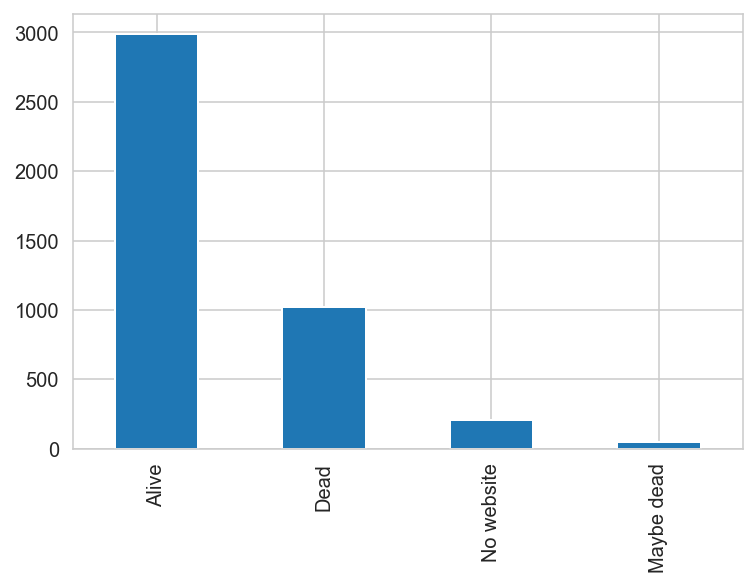

In [96]:
seedstar['WEBSITE DEAD?'].value_counts().plot(kind='bar')

## FUNDING

In [99]:
seedstar['NEW DATA?'].describe()

count     1650
unique       1
top        YES
freq      1650
Name: NEW DATA?, dtype: object

In [100]:
seedstar.drop('NEW DATA?', axis=1, inplace=True)

In [101]:
seedstar['event_name'].value_counts()

Seedstars Lagos                    82
Seedstars Santiago                 62
Seedstars Sao Paulo                61
Seedstars Beirut                   58
Seedstars Moscow                   55
                                   ..
Seedstars Wild Card                 1
Inicia Educacion                    1
Seedstars Apia                      1
Seedstars Bali                      1
Seedstars Accelerator Tanzania0     1
Name: event_name, Length: 214, dtype: int64

In [102]:
seedstar.drop('event_name', axis=1, inplace=True)

## Country

In [103]:
seedstar['country'].unique()

array(['Uzbekistan', 'China', 'Mozambique', 'Argentina', 'Bangladesh',
       'Indonesia', 'Iran', 'Australia', 'Kazakhstan', 'Malaysia',
       'Vietnam', 'Guatemala', 'Philippines', 'Poland', 'Nigeria',
       'Rwanda', 'Lebanon', 'Uganda', 'Ukraine', 'Senegal', 'Myanmar',
       'Jordan', 'Armenia', 'Malawi', 'South Africa', 'Egypt',
       'Singapore', 'India', 'Ecuador', 'Peru', 'Hong Kong', 'Estonia',
       'Iraq', 'Uruguay', 'Ethiopia', 'Kenya', 'Taiwan', 'Czech Republic',
       'United States', 'Colombia', 'Bulgaria', 'Serbia', 'Panama',
       'Palestine', 'Thailand', 'Brazil', 'Botswana', 'Pakistan',
       'Algeria', 'Gambia', "Cote d'Ivoire", 'Mali', 'Zimbabwe',
       'Tunisia', 'Democratic Republic of Congo', 'Ghana', 'Tanzania',
       'Switzerland', 'Morocco', 'Cameroon', 'Sierra Leone', 'Chile',
       'Latvia', 'Mexico', 'Turkey', 'Russia', 'Bahrain', 'Saudi Arabia',
       'Sri Lanka', 'United Arab Emirates', 'Bolivia', 'Azerbaijan',
       'South Korea', 'Libya', 

In [104]:
len(seedstar[seedstar['country'].isnull()])

13

In [105]:
len(seedstar[seedstar['industry'].isnull()])

122

In [106]:
to_drop = seedstar[seedstar['country'].isnull() & (seedstar['industry'].isnull())].index
seedstar.drop(index=to_drop, inplace=True)

In [107]:
seedstar[seedstar['country'].isnull()]

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,date_first_sale,number of competitors,role_0,gender_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,Age of the entrepreneur 1,city_1,country_1,role_2,gender_2,Age of the entrepreneur 2,city_2,country_2,company_logo,date_created,Latest annualized revenues USD,CAGR since incorporation,# of employees - normalise it or average it + add the date when the data was collected,Date we collected the information,Funding before Seedstars,FUNDING AFTER THE EVENT,Total Funding,WEBSITE DEAD?,Funding after the event?,FUNDING - ALL FROM 3RD PARTY,avg_age_of_entrepreneur,gender_ratio,male_ratio,website_dead_decode
1677,1678,NaN,Consumer Products,Pre-Revenue Stage,1.0,2015.0,58.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,400000,NaN,3.0,10000.0,0.0,0.0,600.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,5000.0,2016.0,NaN,Founder,0.0,NaN,Hong Kong,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,10,2020-08-16,NaN,NaN,NaN,Alive,NaN,NaN,30.0,"[0.0, nan, nan]",NaN,1
1712,1713,NaN,Other,NaN,NaN,2019.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Founder,0.0,NaN,NaN,NaN,CMO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2019.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Alive,NaN,NaN,30.0,"[0.0, nan, nan]",NaN,1
1921,1922,NaN,Health / Wellness,Revenue Stage,1.0,2016.0,50.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,175000,NaN,6.0,440.0,175.0,20.0,300.0,100.0,25.0,300.0,100.0,25.0,NaN,NaN,NaN,40000.0,2016.0,NaN,Founder,1.0,30.0,Kigali,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaT,NaN,3000000.0,3000000.0,Alive,3000000.0,3000000.0,30.0,"[1.0, nan, nan]",NaN,1


In [43]:
seedstar['country'].fillna(seedstar['country_0'], inplace=True)

In [108]:
seedstar[seedstar['country'].isnull()]

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,date_first_sale,number of competitors,role_0,gender_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,Age of the entrepreneur 1,city_1,country_1,role_2,gender_2,Age of the entrepreneur 2,city_2,country_2,company_logo,date_created,Latest annualized revenues USD,CAGR since incorporation,# of employees - normalise it or average it + add the date when the data was collected,Date we collected the information,Funding before Seedstars,FUNDING AFTER THE EVENT,Total Funding,WEBSITE DEAD?,Funding after the event?,FUNDING - ALL FROM 3RD PARTY,avg_age_of_entrepreneur,gender_ratio,male_ratio,website_dead_decode
1677,1678,NaN,Consumer Products,Pre-Revenue Stage,1.0,2015.0,58.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,400000,NaN,3.0,10000.0,0.0,0.0,600.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,5000.0,2016.0,NaN,Founder,0.0,NaN,Hong Kong,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,10,2020-08-16,NaN,NaN,NaN,Alive,NaN,NaN,30.0,"[0.0, nan, nan]",NaN,1
1712,1713,NaN,Other,NaN,NaN,2019.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Founder,0.0,NaN,NaN,NaN,CMO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2019.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Alive,NaN,NaN,30.0,"[0.0, nan, nan]",NaN,1
1921,1922,NaN,Health / Wellness,Revenue Stage,1.0,2016.0,50.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,175000,NaN,6.0,440.0,175.0,20.0,300.0,100.0,25.0,300.0,100.0,25.0,NaN,NaN,NaN,40000.0,2016.0,NaN,Founder,1.0,30.0,Kigali,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaT,NaN,3000000.0,3000000.0,Alive,3000000.0,3000000.0,30.0,"[1.0, nan, nan]",NaN,1


In [109]:
to_drop = seedstar[seedstar['country'].isnull()].index

In [110]:
seedstar.drop(index= to_drop, inplace=True)

In [115]:
# Drop seedstars with more than 80% of columns
percent_missing = seedstar.isnull().sum()*100/len(seedstar)
NA_seedstar = pd.DataFrame({'column_name': seedstar.columns,
                            'percent_missing': percent_missing})
# Columns with more than 80% of missing data
print('\nColumns with more than 80% of missing data:')
NA_seedstar[NA_seedstar['percent_missing']>=80]


Columns with more than 80% of missing data:


,column_name,percent_missing
date_first_sale,date_first_sale,83.663366
Age of the entrepreneur 1,Age of the entrepreneur 1,88.071664
Age of the entrepreneur 2,Age of the entrepreneur 2,93.116455
city_2,city_2,86.775106
country_2,country_2,86.727959
Latest annualized revenues USD,Latest annualized revenues USD,98.821311
CAGR since incorporation,CAGR since incorporation,99.127770
# of employees - normalise it or average it + add the date when the data was collected,# of employees - normalise it or average it + ...,92.432815
Date we collected the information,Date we collected the information,92.385667
FUNDING AFTER THE EVENT,FUNDING AFTER THE EVENT,89.910420


In [117]:
# Nor drop all columns with more than 80% of missing value
more80_NA_col = (NA_seedstar[NA_seedstar['percent_missing']>=80].column_name)
df = seedstar.drop(more80_NA_col, axis=1)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4242 entries, 0 to 4254
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          4242 non-null   int64  
 1   country                             4242 non-null   object 
 2   industry                            4130 non-null   object 
 3   business_stage                      3557 non-null   object 
 4   incorporated                        3558 non-null   float64
 5   incorporation_date                  4242 non-null   float64
 6   Age today                           3687 non-null   float64
 7   Number of team members              4242 non-null   float64
 8   revenue_model_commission            3535 non-null   float64
 9   revenue_model_product               3535 non-null   float64
 10  revenue_model_on-demand             3535 non-null   float64
 11  revenue_model_subscription          3535 no

In [119]:
df.to_csv('seedstar_new.csv')

# Look into columns:

- Revenue model
- Customer type
- Customer interaction
- Funding
- User
- Number transactions


## `Revenue Model`

In [120]:
df = pd.read_csv('seedstar_new.csv')

In [121]:
df = df.drop(df.columns[0], axis=1)

In [122]:
df[['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand',
    'revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 
    'revenue_model_licensing']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue_model_commission    3535 non-null   float64
 1   revenue_model_product       3535 non-null   float64
 2   revenue_model_on-demand     3535 non-null   float64
 3   revenue_model_subscription  3535 non-null   float64
 4   revenue_model_freemium      3535 non-null   float64
 5   revenue_model_advertising   3535 non-null   float64
 6   revenue_model_licensing     3535 non-null   float64
dtypes: float64(7)
memory usage: 232.1 KB


In [123]:
revenue_model = df[['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand',
    'revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 
    'revenue_model_licensing']]

In [124]:
for i in revenue_model.columns:
    print(revenue_model[i].value_counts())

0.0    2520
1.0    1015
Name: revenue_model_commission, dtype: int64
0.0    2048
1.0    1487
Name: revenue_model_product, dtype: int64
0.0    2958
1.0     577
Name: revenue_model_on-demand, dtype: int64
1.0    2054
0.0    1481
Name: revenue_model_subscription, dtype: int64
0.0    2876
1.0     659
Name: revenue_model_freemium, dtype: int64
0.0    2729
1.0     806
Name: revenue_model_advertising, dtype: int64
0.0    3090
1.0     445
Name: revenue_model_licensing, dtype: int64


**1. Commission Revenue Model** The commission model is a revenue model where a user is charged a fee for each transaction. It is by far the most popular online marketplace business model. When the customer pays the supplier, the marketplace charges a percentage or a fixed fee for its services.

**2. Subscription Revenue Model** The subscription model is a marketplace revenue model where a user is charged a regular fee for access to the platform.The value proposition of the online marketplaces that use a subscription model is helping the suppliers to find new clients, or getting access to the database of potential clients or partners.

**3. Freemium Revenue Model Freemium** is a revenue model where a marketplace has both free and premium features. This model is a bit tricky to work with since your marketplace needs to offer very alluring premium features for users.

**4. Featured Listings and Ads** The featured listings and ads model is an online marketplace revenue model where sellers buy advertising privileges to enhance visibility on the platform. Sellers or service providers pay to have a featured listing higher than others or be at the top of a certain category provided that all other listings are free to pos

In [125]:
revenue_model.isnull().sum()

revenue_model_commission      707
revenue_model_product         707
revenue_model_on-demand       707
revenue_model_subscription    707
revenue_model_freemium        707
revenue_model_advertising     707
revenue_model_licensing       707
dtype: int64

In [126]:
df[['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand','revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 'revenue_model_licensing']].mode()
most_freq = df['revenue_model_commission'].mode()[0]
most_freq

0.0

In [127]:
def impute_nan_most_frequent(dataframe,column):
  
    most_frequent_category=dataframe[column].mode()[0]
    
    # replace nan values with most occured category
    dataframe[column + "_Imputed"] = dataframe[column]
    dataframe[column + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
    return dataframe

In [128]:
columns = ['revenue_model_commission','revenue_model_product', 'revenue_model_on-demand','revenue_model_subscription', 'revenue_model_freemium', 'revenue_model_advertising', 'revenue_model_licensing']

for column in columns:
    df = impute_nan_most_frequent(df, column)

In [129]:
df.head(5)

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,WEBSITE DEAD?,avg_age_of_entrepreneur,gender_ratio,website_dead_decode,revenue_model_commission_Imputed,revenue_model_product_Imputed,revenue_model_on-demand_Imputed,revenue_model_subscription_Imputed,revenue_model_freemium_Imputed,revenue_model_advertising_Imputed,revenue_model_licensing_Imputed
0,1,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017.0,36.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,0,NaN,1.0,110.0,109.0,131.0,459.0,455.0,549.0,459.0,455.0,549.0,NaN,NaN,NaN,108.0,1.0,Founder,0.0,31.0,Tashkent,Uzbekistan,Project manager,0.0,NaN,NaN,CTO,0.0,1,2018.0,NaN,NaN,Alive,31.0,"['0.0', '0.0', '0.0']",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,China,Sports,Pre-Revenue Stage,1.0,2017.0,43.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,Just started raising,0,1000000,10.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,NaN,NaN,NaN,35000.0,2.0,CEO,0.0,43.0,Shanghai,China,Project manager,0.0,Shanghai,China,Software Engineer,0.0,1,NaN,1000000,1000000.0,Dead,36.0,"['0.0', '0.0', '0.0']",1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,Mozambique,Education,Beta Testing Stage,1.0,2015.0,58.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,200000,Just started,300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,NaN,Chairman,0.0,NaN,Maputo,Portugal,CTO,NaN,NaN,NaN,CMO,0.0,1,NaN,300000,300000.0,Dead,30.0,"['0.0', 'nan', '0.0']",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,Argentina,Industrial / Energy / Clean Tech,Expansion Stage,1.0,2016.0,54.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,100000,Will start in next 3-6 months,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,NaN,CEO & Happiness Offi,0.0,NaN,Buenos Aires,Argentina,CEO,NaN,NaN,NaN,R&D Manager,0.0,1,NaN,0,0.0,Dead,30.0,"['0.0', 'nan', '0.0']",1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,Bangladesh,Education,Revenue Stage,1.0,2015.0,64.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,175000,Good leads,80000,5.0,5000.0,5000.0,5000.0,78818.0,72769.0,74034.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.0,CEO,0.0,NaN,Dhaka,Bangladesh,Chief Communications,NaN,NaN,NaN,NaN,NaN,0,NaN,80000,80000.0,Alive,30.0,"['0.0', 'nan', 'nan']",1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## `Customer Type`

In [130]:
df[['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G',]].isnull().sum()

customer_type - B-to-B-to-C    706
customer_type - B-to-B         706
customer_type - B-to-C         706
customer_type - B-to-G         706
dtype: int64

In [131]:
df[['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G',]].mode()

,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G
0,0.0,1.0,0.0,0.0


In [132]:
columns = ['customer_type - B-to-B-to-C', 'customer_type - B-to-B','customer_type - B-to-C', 'customer_type - B-to-G']

for column in columns:
    df = impute_nan_most_frequent(df, column)
    
df.head()

,company_id,country,industry,business_stage,incorporated,incorporation_date,Age today,Number of team members,revenue_model_commission,revenue_model_product,revenue_model_on-demand,revenue_model_subscription,revenue_model_freemium,revenue_model_advertising,revenue_model_licensing,customer_type - B-to-B-to-C,customer_type - B-to-B,customer_type - B-to-C,customer_type - B-to-G,customer_interaction - web,customer_interaction - mobile,customer_interaction - physical,accelerator,amount_to_raise,status_of_funding,funding at the time of application,number_employees,revenue_1month,revenue_2month,revenue_3month,users_1month,users_2month,users_3month,paying_users_1month,paying_users_2month,paying_users_3month,number_transactions_1month,number_transactions_2month,number_transactions_3month,burn_rate,number of competitors,role_0,gender_0,Age of the entrepreneur 0,city_0,country_0,role_1,gender_1,city_1,country_1,role_2,gender_2,company_logo,date_created,Funding before Seedstars,Total Funding,WEBSITE DEAD?,avg_age_of_entrepreneur,gender_ratio,website_dead_decode,revenue_model_commission_Imputed,revenue_model_product_Imputed,revenue_model_on-demand_Imputed,revenue_model_subscription_Imputed,revenue_model_freemium_Imputed,revenue_model_advertising_Imputed,revenue_model_licensing_Imputed,customer_type - B-to-B-to-C_Imputed,customer_type - B-to-B_Imputed,customer_type - B-to-C_Imputed,customer_type - B-to-G_Imputed
0,1,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017.0,36.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,0,NaN,1.0,110.0,109.0,131.0,459.0,455.0,549.0,459.0,455.0,549.0,NaN,NaN,NaN,108.0,1.0,Founder,0.0,31.0,Tashkent,Uzbekistan,Project manager,0.0,NaN,NaN,CTO,0.0,1,2018.0,NaN,NaN,Alive,31.0,"['0.0', '0.0', '0.0']",1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,China,Sports,Pre-Revenue Stage,1.0,2017.0,43.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,Just started raising,0,1000000,10.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,NaN,NaN,NaN,35000.0,2.0,CEO,0.0,43.0,Shanghai,China,Project manager,0.0,Shanghai,China,Software Engineer,0.0,1,NaN,1000000,1000000.0,Dead,36.0,"['0.0', '0.0', '0.0']",1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,Mozambique,Education,Beta Testing Stage,1.0,2015.0,58.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,200000,Just started,300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,NaN,Chairman,0.0,NaN,Maputo,Portugal,CTO,NaN,NaN,NaN,CMO,0.0,1,NaN,300000,300000.0,Dead,30.0,"['0.0', 'nan', '0.0']",1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,4,Argentina,Industrial / Energy / Clean Tech,Expansion Stage,1.0,2016.0,54.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,100000,Will start in next 3-6 months,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,NaN,CEO & Happiness Offi,0.0,NaN,Buenos Aires,Argentina,CEO,NaN,NaN,NaN,R&D Manager,0.0,1,NaN,0,0.0,Dead,30.0,"['0.0', 'nan', '0.0']",1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,Bangladesh,Education,Revenue Stage,1.0,2015.0,64.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,175000,Good leads,80000,5.0,5000.0,5000.0,5000.0,78818.0,72769.0,74034.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.0,CEO,0.0,NaN,Dhaka,Bangladesh,Chief Communications,NaN,NaN,NaN,NaN,NaN,0,NaN,80000,80000.0,Alive,30.0,"['0.0', 'nan', 'nan']",1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## `Customer Interaction`

In [133]:
df[['customer_interaction - web', 'customer_interaction - mobile','customer_interaction - physical']].isnull().sum()

customer_interaction - web         3012
customer_interaction - mobile      3012
customer_interaction - physical    3012
dtype: int64

In [134]:
cus_interaction = df[['customer_interaction - web', 'customer_interaction - mobile','customer_interaction - physical']]
for i in cus_interaction.columns:
    print(cus_interaction[i].value_counts())

1.0    1012
0.0     218
Name: customer_interaction - web, dtype: int64
1.0    1049
0.0     181
Name: customer_interaction - mobile, dtype: int64
0.0    876
1.0    354
Name: customer_interaction - physical, dtype: int64


## `Funding`

In [135]:
fund = df[['amount_to_raise','status_of_funding', 'funding at the time of application']]

In [136]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   amount_to_raise                     2402 non-null   object
 1   status_of_funding                   3026 non-null   object
 2   funding at the time of application  3504 non-null   object
dtypes: object(3)
memory usage: 99.5+ KB


## `Amount_to_raise` and `Status_of_funding`

All the values in Status of funding column and Amount to raise is switch between each other, so I will switch them again

In [137]:
num_list_error = [i for i in df.status_of_funding.unique() if i not in ['Just started',
                                                      'Will start in next 3-6 months',
                                                      'Good leads',
                                                      'Closing the round in the next 2-4 weeks',
                                                      'Committed less than 50% of round',
                                                      'Closed',
                                                      'Committed more than 50% of round',
                                                      'Will start in next 6-12 months',
                                                      'Round started',
                                                      'No funding',
                                                      'Round about to start',
                                                      'Round is Closed',
                                                      'Just started raising',
                                                      'Not applicable',
                                                      'About to close',
                                                      '3,000,000.00 XXX',
                                                      'nan',
                                                      'Round closed']]

In [138]:
fund['amount_to_raise'].isnull().sum()

1840

In [139]:
status_list = ['Committed more than 50% of round','Just started raising', 'Closed','Just started raising', 
               'Closing the round in the next 2-4 weeks', 'Committed less than 50% of round']
for status in status_list:
    for i in range(len(df)):
        if df['amount_to_raise'][i] == status:
            df['amount_to_raise'][i] = df['status_of_funding'][i]
            df['status_of_funding'][i] = status


In [140]:
for i in num_list_error:
    df[df['status_of_funding']==i]['amount_to_raise'].fillna(df[df['status_of_funding']==i]['status_of_funding'], inplace=True)

In [141]:
for i in range(len(fund)):
    if df['status_of_funding'][i] in num_list_error:
        df['status_of_funding'][i] = 'NaN'

In [142]:
# Convert amount_to_raise to float
df['amount_to_raise'] = df.amount_to_raise.apply(lambda x:float(str(x).replace('.00 XXX','').replace(',','')))

In [143]:
df['status_of_funding'].unique()

array(['NaN', 'Just started raising', 'Just started',
       'Will start in next 3-6 months', 'Good leads',
       'Closing the round in the next 2-4 weeks', 'Closed',
       'Not applicable', 'Committed less than 50% of round',
       'About to close', 'Committed more than 50% of round',
       'Will start in next 6-12 months', 'Round started', 'Round closed',
       'Round is Closed', 'No funding', 'Round about to start'],
      dtype=object)

In [144]:
# Convert funding at the time of application to float
df['funding at the time of application'] = df['funding at the time of application'].apply(lambda x:float(str(x).replace(',','').replace(' ','')))

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   company_id                           4242 non-null   int64  
 1   country                              4242 non-null   object 
 2   industry                             4130 non-null   object 
 3   business_stage                       3557 non-null   object 
 4   incorporated                         3558 non-null   float64
 5   incorporation_date                   4242 non-null   float64
 6   Age today                            3687 non-null   float64
 7   Number of team members               4242 non-null   float64
 8   revenue_model_commission             3535 non-null   float64
 9   revenue_model_product                3535 non-null   float64
 10  revenue_model_on-demand              3535 non-null   float64
 11  revenue_model_subscription    

In [145]:
df.to_csv('seedstar_cleaned_2.csv')

# EDA

### 1. Distribution of Business Stage

Text(0, 0.5, 'Count')

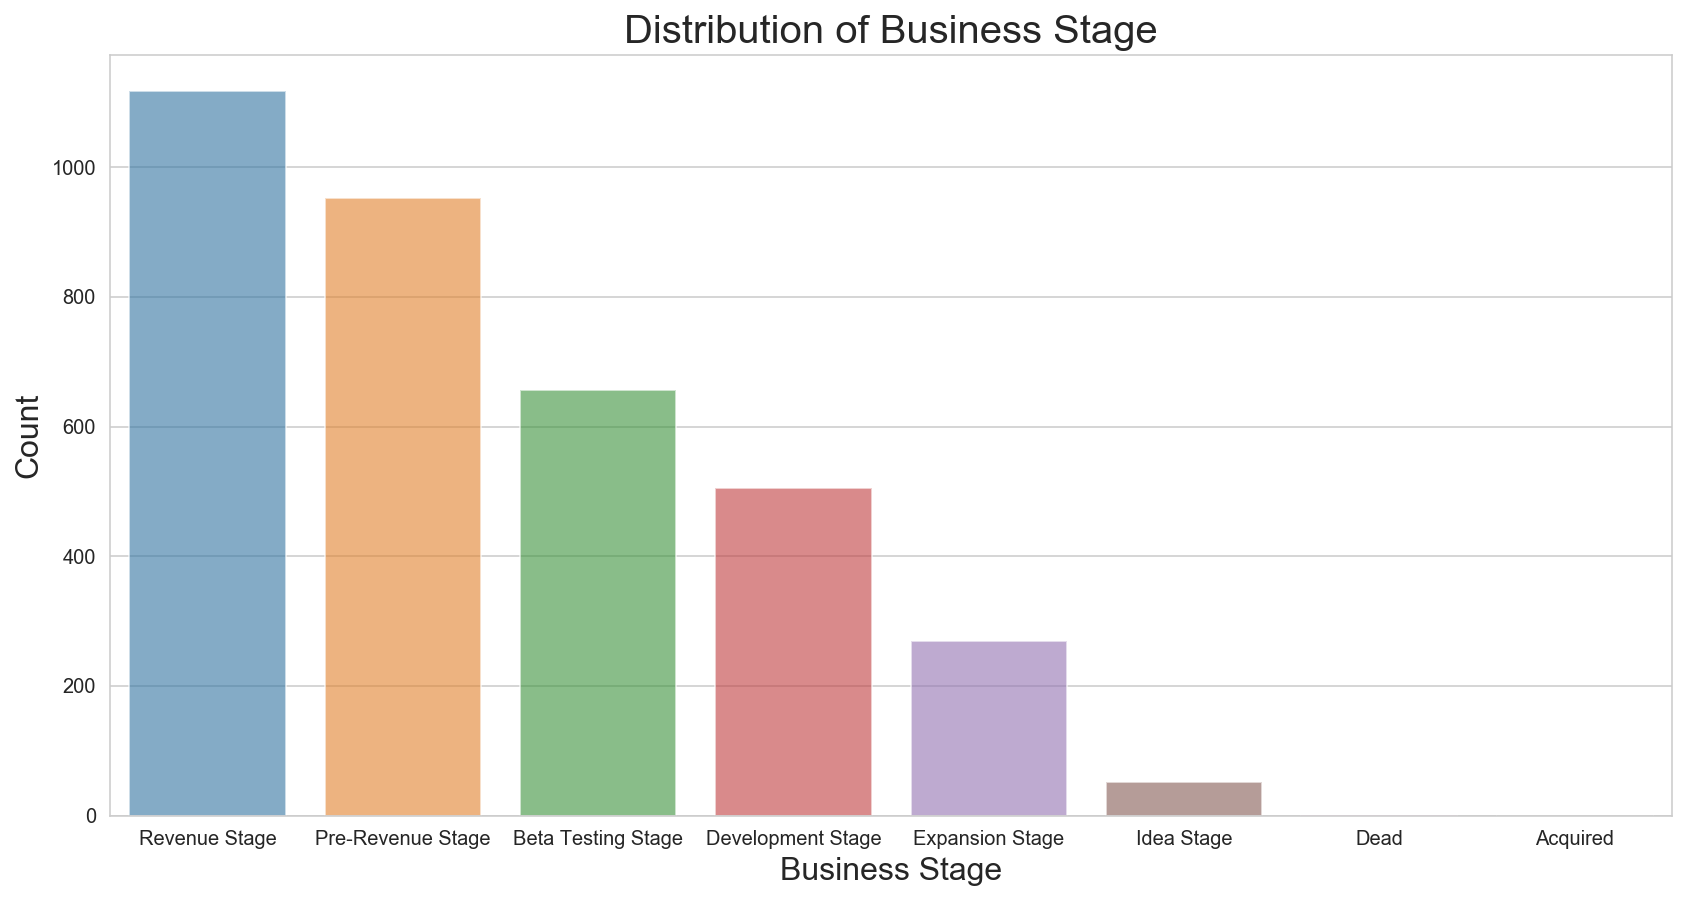

In [147]:
plt.figure(figsize=(14,7))
business_stage = df.business_stage.value_counts()
sns.barplot(y = business_stage.values,
            x = business_stage.index,
            alpha = 0.6);
plt.title('Distribution of Business Stage', fontsize = 20)
plt.xlabel('Business Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)

### 2. Amount to raise, Status of Funding and Funding at Time of Application

In [148]:
df[['amount_to_raise','status_of_funding','funding at the time of application']].describe(include='all')

,amount_to_raise,status_of_funding,funding at the time of application
count,2.392000e+03,4242,3.504000e+03
unique,NaN,17,NaN
top,NaN,NaN,NaN
freq,NaN,1835,NaN
mean,3.423592e+05,NaN,1.031016e+05
std,2.992308e+06,NaN,5.278166e+05
min,0.000000e+00,NaN,0.000000e+00
25%,2.500000e+03,NaN,0.000000e+00
50%,8.000000e+04,NaN,3.075000e+03
75%,3.000000e+05,NaN,7.000000e+04


C:\Users\Jennie\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Jennie\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Jennie\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


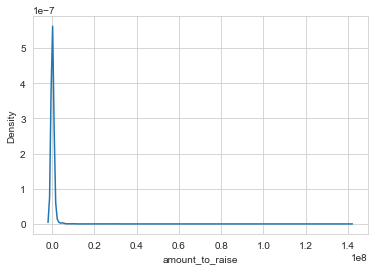

In [299]:
sns.kdeplot(data = df['amount_to_raise'])